In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
main_df = pd.read_csv('telecom_churn_data.csv')

In [4]:
#del main_df

In [5]:
main_df.shape

(99999, 226)

around 1 Lakh customer data available

In [6]:
main_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [7]:
(main_df['mobile_number'].value_counts() > 1).any()

False

In [3]:
missing_values = main_df.isnull().mean()
columns_with_missing_values = missing_values[missing_values > 0.4].index.tolist()
len(columns_with_missing_values)

40

around 40 features having more than 50 percent missing data so we can drop these 

In [4]:
main_df = main_df.drop(columns_with_missing_values, axis=1)

In [5]:
missing_values = main_df.isnull().mean()
columns_with_missing_values = missing_values[missing_values > 0].index.tolist()
len(columns_with_missing_values)

126

In [6]:
len(main_df.columns)

186

There are still 126 features having missing values

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
main_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0

In [15]:
main_df['circle_id'].value_counts()

109    99999
Name: circle_id, dtype: int64

We see some columns might be complete constant or having more that 99% same value lets drop them as those does not give any variance or contribute

In [9]:
# Calculate the percentage of similarity for each column
similarity_percentage = main_df.apply(lambda x: x.duplicated().sum() / len(x), axis=0)

# Get the columns to drop
columns_to_drop = similarity_percentage[similarity_percentage >= 0.99].index.tolist()


# Drop the columns
main_df = main_df.drop(columns_to_drop, axis=1)

In [10]:
main_df.shape

(99999, 131)

In [11]:
main_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,362,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,968,30.4,0.0,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,1.83,0.00,0.0,0.00,0.00,0.00,0.0,0.00,74,384,283,121,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,1006,0.0,0.0,0.00,0.00
2,7001625959,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,75.53,9.28,1.48,14.76,22.83,0.0,47.64,108.68,120.94,18.04,0.0,0.0,0.0,0.0,46.56,236.84,96.84,42.08,0.45,155.33,412.94,285.46,124.94,115.69,71.11,67.46,148.23,14.38,15.44,38.89,38.98,99.48,122.29,49.63,158.19,229.56,208.86,155.99,345.41,72.41,71.29,28.69,49.44,45.18,177.01,167.09,118.18,21.73,58.34,43.23,3.86,139.33,306.66,239.03,171.49,370.04,519.53,395.03,517.74,0.00,0.85,0.0,0.01,0.93,3.14,0.0,0.36,168,315,116,358,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,1103,0.0,0.0,4.17,0.00
3,7001204172,221.338,251.

Lets fix other missing values

In [12]:
missing_values = main_df.isnull().mean()
columns_with_missing_values = missing_values[missing_values > 0].index.tolist()
len(columns_with_missing_values)

101

Before dropping or manipulating other missing data features lets check if the features which will be used for deriving target is having missing or not Derive Target column from the data

In [13]:
main_df[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

Dont see any missing values from these

In [14]:
main_df[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.0,0.00
1,188.04,72.11,0.0,0.00
2,517.74,124.94,0.0,8.42
3,305.38,362.54,0.0,0.00
4,205.31,104.59,0.0,0.00


In [15]:
def tag_churn(row):
    if (row['total_ic_mou_9'] == 0 or row['total_og_mou_9'] == 0) and (row['vol_2g_mb_9'] == 0 or row['vol_3g_mb_9'] == 0):
        return 1
    else:
        return 0

In [16]:
main_df['churn'] = main_df.apply(tag_churn, axis=1)

In [17]:
main_df['churn'].value_counts(normalize=True)

0    0.865939
1    0.134061
Name: churn, dtype: float64

Data is highly imbalance so we need to incorporate the Imbalance techniques

Finding all the last phase data

In [18]:
columns_with_last_month_data = [col for col in main_df.columns if '_9' in col]

In [19]:
columns_with_last_month_data

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9']

Removing all attributes corresponding to the churn phase

In [20]:
main_df = main_df.drop(columns_with_last_month_data, axis=1)

In [21]:
main_df.shape

(99999, 101)

In [22]:
missing_values = main_df.isnull().mean()
columns_with_missing_values = missing_values[missing_values > 0].index.tolist()
len(columns_with_missing_values)

76

In [23]:
main_df['churn'].value_counts(normalize=True)

0    0.865939
1    0.134061
Name: churn, dtype: float64

Lets find the categorical features which having missing values

In [24]:
cat_cols = main_df[columns_with_missing_values].select_dtypes(include='object').columns.tolist()

In [26]:
cat_cols
# No categorical columns found having missing values

[]

So the features having missing values all are numerical in nature so imputing with Median values

In [30]:
len(columns_with_missing_values)

76

In [29]:
main_df[columns_with_missing_values].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8
count,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000
mean,132.395875,133.670805,133.018098,197.935577,197.045133,196.574803,9.950013,7.149898,7.292981,13.911337,9.818732,9.971890,47.100763,46.473010,45.887806,93.342088,91.397131,91.755128,3.751013,3.792985,3.677991,1.123056,1.368500,1.433821,144.201175,141.670476,141.328209,79.829870,83.299598,83.282673,87.299624,90.804137,89.838390,1.129011,1.115010,1.067792,168.261218,175.221436,174.191498,0.798277,0.776572,0.791247,3.916811,4.978279,5.053769,0.454157,47.922365,47.990520,47.211362,107.475650,107.120493,108.460515,12.084305,12.599697,11.751834,167.491059,167.719540,167.432575,9.575993,10.011904,9.883921,20.722240,21.656415,21.183211,2.156397,2.216923,2.085004,32.457179,33.887833,33.154735,7.460608,8.334936,8.442001,0.854656,1.012960,0.970800
std,297.207406,308.794148,308.951589,316.851613,325.862803,327.170662,72.825411,73.447948,68.402466,71.443196,58.455762,64.713221,150.856393,155.318705,151.184830,162.780544,157.492308,156.537048,14.230438,14.264986,13.270996,5.448946,7.533445,6.783335,251.751489,248.731086,245.914311,252.476533,263.631042,265.486090,255.617850,269.347911,271.757783,7.984970,8.599406,7.905971,389.948499,408.922934,411.633049,25.765248,25.603052,25.544471,14.936449,20.661570,17.855111,4.125911,140.258485,145.795055,137.239552,171.713903,169.423620,169.723759,40.140895,42.977442,39.125379,254.124029,256.242707,250.025523,54.330607,57.411971,55.073186,80.793414,86.521393,83.683565,16.495594,16.454061,15.812580,106.283386,113.720168,110.127008,59.722948,65.219829,63.813098,11.955164,12.673099,13.284348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [31]:
for col in columns_with_missing_values:
    main_df[col].fillna(main_df[col].median(), inplace=True)

In [32]:
missing_values = main_df.isnull().mean()
columns_with_missing_values = missing_values[missing_values > 0].index.tolist()
len(columns_with_missing_values)

0

In [33]:
main_df['churn'].value_counts(normalize=True)

0    0.865939
1    0.134061
Name: churn, dtype: float64

Lets now find the Values customer data

In [43]:
main_df.select_dtypes(include='int64').columns

Index(['mobile_number', 'age_on_network', 'churn'], dtype='object')

In [40]:
main_df.rename(columns={'aon': 'age_on_network'}, inplace=True)

In [42]:
main_df['total_rech_amt_6'] = main_df['total_rech_amt_6'].astype(float)
main_df['total_rech_amt_7'] = main_df['total_rech_amt_7'].astype(float)
main_df['total_rech_amt_8'] = main_df['total_rech_amt_8'].astype(float)
main_df['first_two_phase_rech_total'] = (main_df['total_rech_amt_6'] + main_df['total_rech_amt_7'])/2

In [44]:
main_df['first_two_phase_rech_total'].describe(percentiles=[0.25, 0.5, 0.70])

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
25%        115.000000
50%        229.000000
70%        368.500000
max      37762.500000
Name: first_two_phase_rech_total, dtype: float64

In [45]:
avg_70_percentile = main_df['first_two_phase_rech_total'].quantile(0.70)

In [46]:
avg_70_percentile

368.5

In [47]:
main_df['high_value_customers'] = (main_df['total_rech_amt_6'] + main_df['total_rech_amt_7']).apply(lambda x: 1 if x > avg_70_percentile else 0)

In [48]:
main_df['high_value_customers'].value_counts(normalize=True)

1    0.584946
0    0.415054
Name: high_value_customers, dtype: float64

In [49]:
len(main_df.columns)

103

In [50]:
skewness = main_df.skew()
skewed_columns = skewness[skewness > 1].index.tolist()
skewed_columns

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',


In [51]:
len(skewed_columns)

100

Till now we have handled missing values, Found out high value costumers , derived target column, removed constant columns and removed the last phase features

Next we will handle class imbalance

<Figure size 5000x5000 with 0 Axes>

<Axes: >

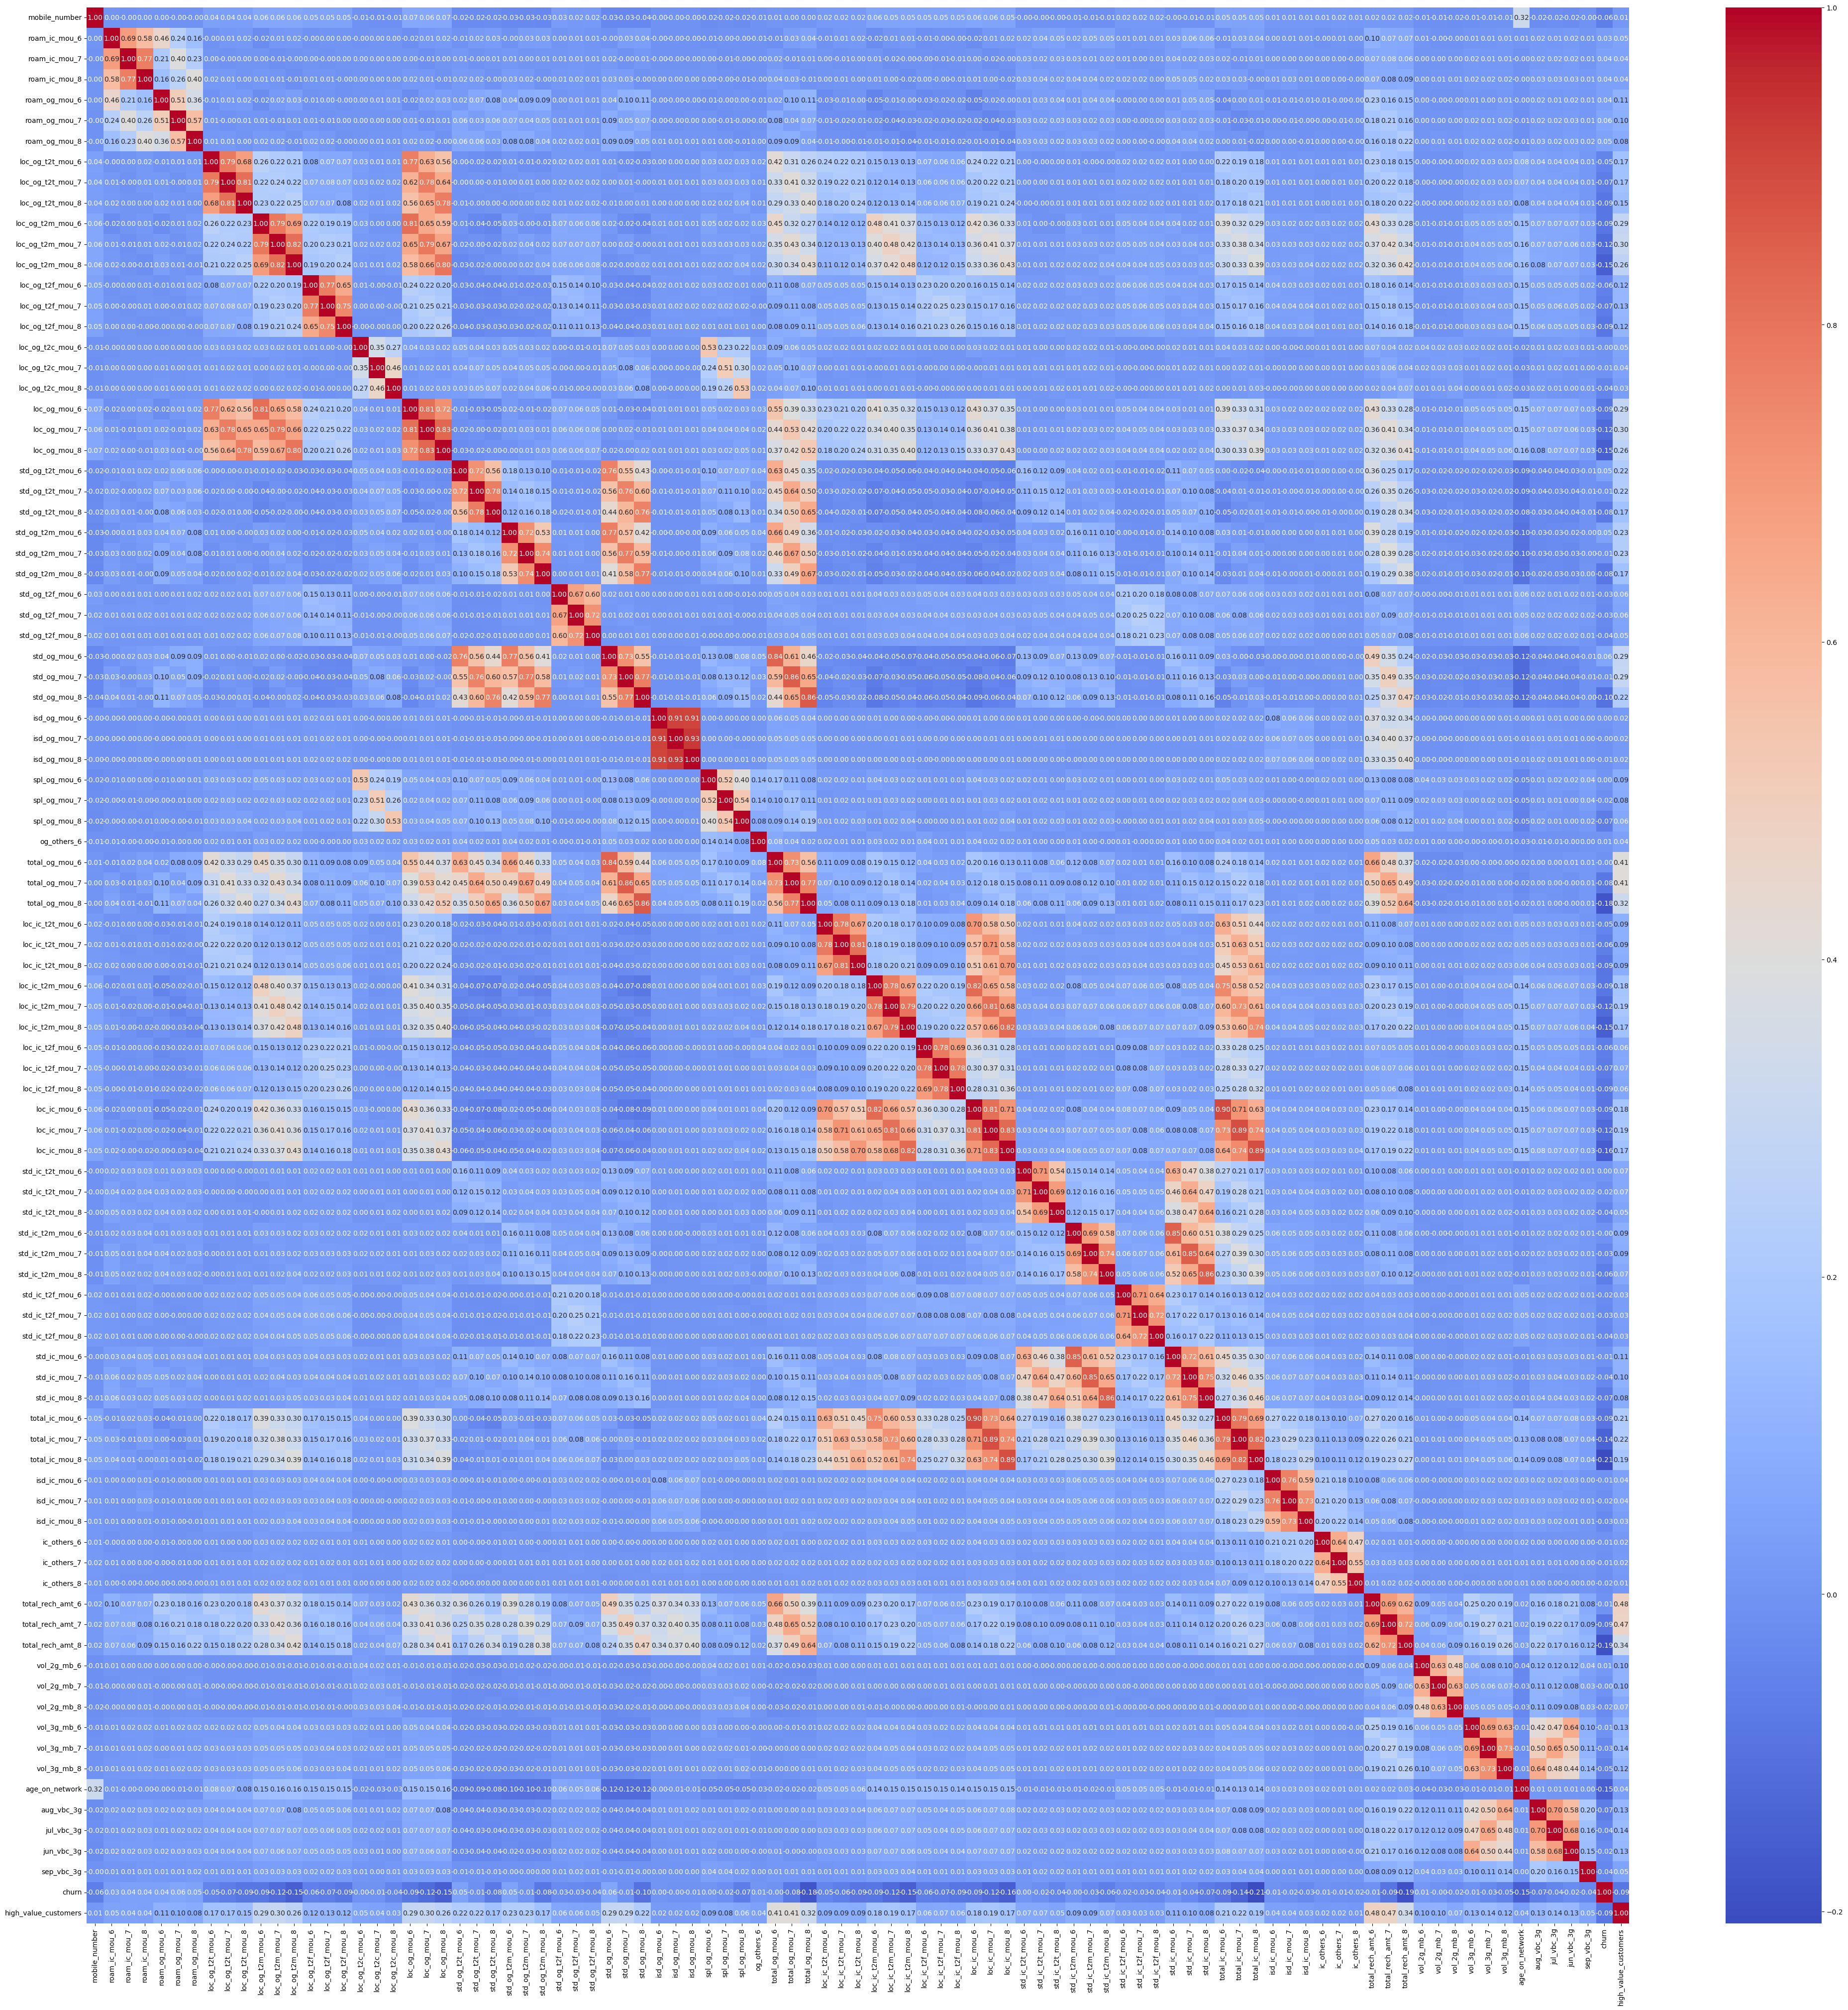

In [80]:
plt.figure(figsize=(50, 50))
sns.heatmap(main_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [68]:
main_df.drop(['first_two_phase_rech_total'], axis=1, inplace=True)

In [71]:
main_df.drop(['arpu_6', 'arpu_7'], axis=1, inplace=True)

In [73]:
main_df.drop(['arpu_8'], axis=1, inplace=True)

In [76]:
main_df.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'], axis=1, inplace=True)

In [78]:
main_df.drop(['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

We can observe some high correlation in the data lets handle those

In [79]:
correlation_matrix = main_df.corr()

# Set the threshold for high correlation
threshold = 0.8

# Find columns with correlation coefficient greater than the threshold
high_correlation_cols = []
for col in correlation_matrix:
    correlated_cols = correlation_matrix[abs(correlation_matrix[col]) > threshold].index.tolist()
    correlated_cols.remove(col)  # Remove self-correlation
    high_correlation_cols.extend([(col, correlated_col) for correlated_col in correlated_cols])

# Print the columns with high correlation
for col_pair in high_correlation_cols:
    print(f"Columns '{col_pair[0]}' and '{col_pair[1]}' have high correlation.")


Columns 'loc_og_t2t_mou_7' and 'loc_og_t2t_mou_8' have high correlation.
Columns 'loc_og_t2t_mou_8' and 'loc_og_t2t_mou_7' have high correlation.
Columns 'loc_og_t2m_mou_6' and 'loc_og_mou_6' have high correlation.
Columns 'loc_og_t2m_mou_7' and 'loc_og_t2m_mou_8' have high correlation.
Columns 'loc_og_t2m_mou_8' and 'loc_og_t2m_mou_7' have high correlation.
Columns 'loc_og_t2m_mou_8' and 'loc_og_mou_8' have high correlation.
Columns 'loc_og_mou_6' and 'loc_og_t2m_mou_6' have high correlation.
Columns 'loc_og_mou_6' and 'loc_og_mou_7' have high correlation.
Columns 'loc_og_mou_7' and 'loc_og_mou_6' have high correlation.
Columns 'loc_og_mou_7' and 'loc_og_mou_8' have high correlation.
Columns 'loc_og_mou_8' and 'loc_og_t2m_mou_8' have high correlation.
Columns 'loc_og_mou_8' and 'loc_og_mou_7' have high correlation.
Columns 'std_og_mou_6' and 'total_og_mou_6' have high correlation.
Columns 'std_og_mou_7' and 'total_og_mou_7' have high correlation.
Columns 'std_og_mou_8' and 'total_og_m

Remaining correlation seems valid so going ahead with those

Lets use PCA to reduce feature

In [121]:
main_df_ = main_df.drop(['mobile_number'], axis=1)

In [129]:
y = main_df_.pop('churn')

In [81]:
from sklearn.decomposition import PCA

Bfore appying PCA we need to standraze the data

In [84]:
from sklearn.preprocessing import StandardScaler

In [130]:
scaller = StandardScaler()
main_df_scalled = scaller.fit_transform(main_df_)

In [132]:
pca = PCA(random_state=42)
pca.fit(main_df_scalled)

PCA(random_state=42)

In [133]:
pca.components_

array([[ 1.36707221e-02,  8.34623018e-03,  1.28226567e-02, ...,
         4.21799625e-02,  1.98462554e-02,  1.28862460e-01],
       [ 2.50207864e-02,  2.05767178e-02,  2.32810275e-02, ...,
        -1.95574794e-02, -1.57748782e-03,  8.83545713e-02],
       [ 2.54224733e-02,  1.84273581e-02,  2.09345286e-02, ...,
        -8.89984355e-03, -1.37851052e-03, -4.08275252e-02],
       ...,
       [ 3.32184342e-08, -1.10456394e-07,  1.80454282e-07, ...,
        -9.01891743e-08, -2.54053815e-08,  1.09835923e-06],
       [ 2.46338868e-08, -1.07152494e-08,  2.14207915e-08, ...,
         3.80796455e-08,  5.67484481e-09, -3.15716902e-07],
       [-3.27759731e-08, -3.25697251e-09,  2.99594322e-08, ...,
         4.83158553e-09,  2.31699214e-08, -2.52143299e-08]])

In [134]:
pca.explained_variance_ratio_

array([1.34850553e-01, 8.75217998e-02, 6.09816019e-02, 4.76206522e-02,
       3.92397957e-02, 3.58615823e-02, 3.40475590e-02, 3.28903971e-02,
       3.04076957e-02, 2.97040906e-02, 2.81543464e-02, 2.49247804e-02,
       2.36962276e-02, 2.29763018e-02, 2.10455773e-02, 2.08367659e-02,
       1.86934310e-02, 1.77467565e-02, 1.74456729e-02, 1.45758873e-02,
       1.31668726e-02, 1.16829353e-02, 1.08774701e-02, 1.07768645e-02,
       1.03811468e-02, 9.84416135e-03, 9.51956517e-03, 9.17365408e-03,
       8.81327033e-03, 8.57795356e-03, 8.23102433e-03, 7.58374817e-03,
       7.44090232e-03, 6.66539370e-03, 5.95496216e-03, 5.70251923e-03,
       5.63489518e-03, 5.40281093e-03, 5.11575808e-03, 4.79804164e-03,
       4.69430348e-03, 4.57796371e-03, 4.57221283e-03, 4.41125560e-03,
       4.24063997e-03, 3.93657800e-03, 3.92095270e-03, 3.80528253e-03,
       3.72275279e-03, 3.64099182e-03, 3.53774300e-03, 3.50411432e-03,
       3.19067266e-03, 2.97344535e-03, 2.94749014e-03, 2.64153664e-03,
      

In [135]:
var_cum = np.cumsum(pca.explained_variance_ratio_)

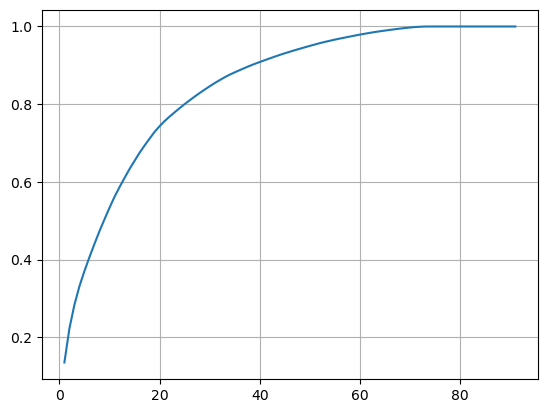

In [136]:
plt.grid() 
plt.plot(range(1, len(var_cum)+1), var_cum)

In [137]:
len(main_df_.columns)

91

In [138]:
pca = PCA(n_components=40, random_state=42)

In [139]:
new_data = pca.fit_transform(main_df_scalled)

In [140]:
main_df_pca = pd.DataFrame(new_data, columns=[f'PC{i}' for i in range(1, 41)])

In [141]:
main_df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,-2.386255,-0.432845,-0.346137,0.339812,-0.136471,0.080041,0.275706,-0.128729,-0.397470,0.109942,0.075831,-0.116546,0.105884,-0.126051,-0.347631,0.066212,0.058776,-0.019446,0.058501,-0.159670,0.129920,-0.031945,0.010175,-0.038609,0.107160,0.018918,-0.568415,-0.342533,0.336807,-0.288843,0.442558,-0.639341,0.739090,-0.079906,0.020513,0.031501,-0.093042,0.175681,0.117774,-0.086377
1,-0.383835,-0.922467,-0.574843,-0.273629,-0.051844,-0.184573,0.246746,-0.392964,0.744265,0.348382,-0.298969,-0.836898,0.253479,0.872268,1.458259,-0.024800,-0.070091,-0.074950,-0.077285,-0.032132,0.047401,0.469954,-0.901786,0.141086,0.968313,-0.194466,0.119639,0.203704,-1.273921,-0.622327,0.099498,-0.255607,1.113958,-0.145465,-0.049155,1.167252,0.247870,-0.261339,0.104484,0.249654
2,2.802984,1.191331,4.637343,0.092648,0.388262,-1.211352,-6.431512,-2.996043,17.300874,3.295885,0.584427,1.273106,-0.802643,-2.942491,1.147620,-1.173543,-0.003282,0.508112,0.338688,-0.748922,0.829762,-5.514629,1.743605,-1.295816,6.224421,1.363564,-3.866165,0.820672,0.295574,1.384495,-0.187483,7.801872,5.883271,0.189519,-0.711776,-0.154615,-0.116471,2.201340,-0.752778,-1.025229
3,-0.198616,-0.009666,0.438382,-0.183344,-0.411762,0.293502,-0.001856,0.759322,0.359552,0.454258,-0.649079,1.032017,0.571202,-0.043219,-0.167941,-0.471764,0.003801,0.360107,-0.249958,-0.260877,0.479289,-0.207767,0.998026,-0.129578,-1.003670,1.233907,-0.154755,0.276875,0.261900,-0.944409,0.145712,-0.968974,0.351939,0.057765,0.106651,0.097043,-0.338153,0.646205,-0.525055,-0.160510
4,0.181632,-1.425886,-0.689848,-0.851029,0.116916,-0.158166,0.969846,-0.086098,-0.375886,0.019586,0.754535,0.137984,-0.021000,-0.205748,0.367438,0.321380,0.089814,-0.085212,0.150945,-0.170763,0.274400,0.042153,-0.453383,0.152284,0.263749,0.376871,-0.176103,-0.040189,-0.352085,-0.184767,0.412890,-0.601561,0.793704,-0.017251,-0.135849,0.031658,0.117373,-0.181330,0.124923,0.280078


In [142]:
main_df_final = pd.concat([y, main_df_pca], axis=1)

In [143]:
main_df_final.head()

,churn,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,1,-2.386255,-0.432845,-0.346137,0.339812,-0.136471,0.080041,0.275706,-0.128729,-0.397470,0.109942,0.075831,-0.116546,0.105884,-0.126051,-0.347631,0.066212,0.058776,-0.019446,0.058501,-0.159670,0.129920,-0.031945,0.010175,-0.038609,0.107160,0.018918,-0.568415,-0.342533,0.336807,-0.288843,0.442558,-0.639341,0.739090,-0.079906,0.020513,0.031501,-0.093042,0.175681,0.117774,-0.086377
1,0,-0.383835,-0.922467,-0.574843,-0.273629,-0.051844,-0.184573,0.246746,-0.392964,0.744265,0.348382,-0.298969,-0.836898,0.253479,0.872268,1.458259,-0.024800,-0.070091,-0.074950,-0.077285,-0.032132,0.047401,0.469954,-0.901786,0.141086,0.968313,-0.194466,0.119639,0.203704,-1.273921,-0.622327,0.099498,-0.255607,1.113958,-0.145465,-0.049155,1.167252,0.247870,-0.261339,0.104484,0.249654
2,0,2.802984,1.191331,4.637343,0.092648,0.388262,-1.211352,-6.431512,-2.996043,17.300874,3.295885,0.584427,1.273106,-0.802643,-2.942491,1.147620,-1.173543,-0.003282,0.508112,0.338688,-0.748922,0.829762,-5.514629,1.743605,-1.295816,6.224421,1.363564,-3.866165,0.820672,0.295574,1.384495,-0.187483,7.801872,5.883271,0.189519,-0.711776,-0.154615,-0.116471,2.201340,-0.752778,-1.025229
3,0,-0.198616,-0.009666,0.438382,-0.183344,-0.411762,0.293502,-0.001856,0.759322,0.359552,0.454258,-0.649079,1.032017,0.571202,-0.043219,-0.167941,-0.471764,0.003801,0.360107,-0.249958,-0.260877,0.479289,-0.207767,0.998026,-0.129578,-1.003670,1.233907,-0.154755,0.276875,0.261900,-0.944409,0.145712,-0.968974,0.351939,0.057765,0.106651,0.097043,-0.338153,0.646205,-0.525055,-0.160510
4,0,0.181632,-1.425886,-0.689848,-0.851029,0.116916,-0.158166,0.969846,-0.086098,-0.375886,0.019586,0.754535,0.137984,-0.021000,-0.205748,0.367438,0.321380,0.089814,-0.085212,0.150945,-0.170763,0.274400,0.042153,-0.453383,0.152284,0.263749,0.376871,-0.176103,-0.040189,-0.352085,-0.184767,0.412890,-0.601561,0.793704,-0.017251,-0.135849,0.031658,0.117373,-0.181330,0.124923,0.280078
